# **Analysis of the English Premier League:**
The data is a journey through the history of the English premier league. We are analyzing historical data from (1992-2023), and we will be able to answer questions that we were interested in finding answers for about the league. Who are the winners of the English Premier League? Who are the runners-ups in the English Premier League? What is the number of teams in the English Premier League per season? What is the evolution of the number of leagues? What is the historical performance of teams? Who received yellow and red cards and how many?

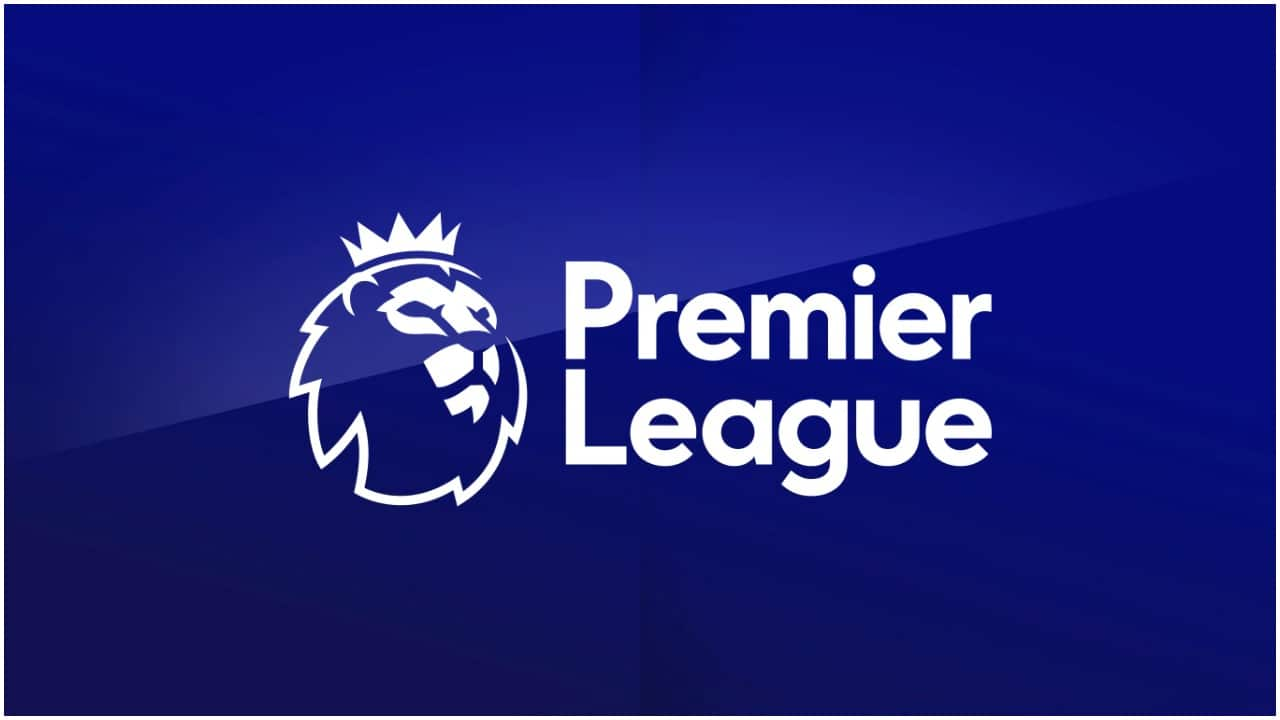

In [92]:
from IPython.display import Image
Image(filename='/content/premier-leagueicon.jpeg') 

In [44]:
import time
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# **Introduction:**
For a brief introduction for those who have never heard about the English Premier League, it is the top football league in England since 1992. It is the top tier of England’s football pyramid, with 20 teams from England and Wales competing for the honor of being crowned English champions. This competition was founded on February 20, 1992, following the decision of clubs in the Football League First Division to break away from the Football League which was founded in 1888. 

Seasons typically run from August to May and each team plays 38 matches, against all 19 other teams. The Premier League is the most-watched sports league in the world. The average Premier League match attendance was 38181 which was second to German Bundesliga’s 43500. 


Data Extraction

In [45]:


plt.style.use('seaborn')
#Website 
web_page = 'https://www.bdfutbol.com/en/t/t.html?cat=eng'

# obtain the html code as a string
response = requests.get(web_page)
html = response.text

# create a BeautifulSoup object
soup = bs4.BeautifulSoup(html, "html.parser")
df_scores = pd.DataFrame()
df_scores.head()
#https://www.bdfutbol.com/en/t/t.html?cat=ger
# loop through the anchor tags
for anchor in soup.find_all(class_="pestanya_texte")[0].find_all('a'):
    
    # get the hypertext reference and the text of the anchor tag
    page = anchor.get('href')
    season = anchor.text
    df_league = pd.read_html("https://www.bdfutbol.com/en/t/" +page)
    df_league=df_league[11]
    # add the season - anchor text and append the data frame to df_scores 
    df_league['season'] = season
    df_scores = df_scores.append(df_league)
    
    # time.sleep(0.2)

# visualize the first five rows of the scraped data frame
df_scores.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Pts.,P,W,D,L,F,A,YC,RD,season
0,NaN,1,NaN,Arsenal,37,14,12,1,1,33,11,23,0,2022-23
1,NaN,2,NaN,Manchester City,32,14,10,2,2,40,14,11,1,2022-23
2,NaN,3,NaN,Newcastle,30,15,8,6,1,29,11,24,0,2022-23
3,NaN,4,NaN,Tottenham,29,15,9,2,4,31,21,26,1,2022-23
4,NaN,5,NaN,Manchester United,26,14,8,2,4,20,20,37,0,2022-23


# **Web data extraction:**
The historical data of the English Premier League (from 1992 to 2023) was scraped from https://www.bdfutbol.com/en/t/t.html?cat=eng. The website contains the soccer, also referred to as football, rankings of the English teams. To scrape the data, we have used BeautifulSoup which is a popular Python library to extract information from the HTML page. Once we retrieved the data, we then stored it in a Pandas data frame so that we can further process the data and gain answers to the questions we had about the data. 

# **Data Cleaning:**
Data cleansing also referred to as data cleaning is the process of removing incorrect data within a dataset. The data cleaning process allows programmers to transform raw data into a form that will be easier to retrieve data and analyze it. Since there are several columns and they are all disorganized, the process of data cleaning will allow us to remove any mislabeled or duplicate data. Firstly, we removed columns by dropping them and then renamed them. Removing unwanted data from our dataset, allows us to eliminate any irrelevant data that doesn’t pertain to what we are looking for specifically. Irrelevant observations that don’t fit into our specific analysis will detract from our main objective which is to learn more about certain aspects of the English premier league. Secondly, we fixed structural errors by removing any columns of the dataset that contained NaN because it will lead to several inconsistencies in the data. Thirdly, we filtered unwanted information out and filtered out any duplicate data by just searching for the .unique() values. We then converted certain columns of the dataset to a format that we wanted to read the values easier. For example, we ensured that we found only the unique season years and looked at the format of the season by using ‘2021-22’. 

After cleaning the data, we were able to obtain a Pandas data frame that will allow us to process the transformations that we want to extract the conclusions we are looking for. As shown, the data frame contains information about the winners of the English Premier League, runner-ups in the English Premier League, number of teams in the English Premier League per season, ev9lution of the number of leagues, historical performance of teams, and the number of yellow and red cards that took place from 1992 to 2023. 

In [46]:
df_scores.drop(columns=['Unnamed: 0', 'Unnamed: 2'], inplace=True)
df_scores.head()
#df_scores.columns
df_scores.rename(columns = {'Unnamed: 1':'Rank'}, inplace = True)
df_scores.rename(columns = {'Unnamed: 3':'Team_Name'}, inplace = True)

In [47]:
df_scores["Year_d"] = df_scores['season'].map(lambda x: x[5:7])

In [48]:
df_score1=df_scores
df_scores.rename(columns = {'Pts.':'Points'}, inplace = True)
df_scores.Points.unique()

array([37, 32, 30, 29, 26, 22, 21, 19, 18, 17, 16, 15, 14, 13, 12, 10, 93,
       92, 74, 71, 69, 58, 56, 52, 51, 49, 48, 46, 45, 40, 39, 38, 35, 23,
       86, 67, 66, 65, 62, 61, 59, 55, 44, 43, 41, 28, 99, 81, 54, 34, 98,
       97, 72, 70, 57, 50, 36, 100, 77, 75, 63, 47, 42, 33, 31, 78, 76,
       24, 60, 87, 79, 64, 84, 82, 89, 73, 25, 80, 68, '86', '85', '75',
       '70', '67', '64', '63', '61', '50', '47', '46', '44', '39', '38',
       '36', '35', '30', '28*', 90, 83, 53, 85, 11, 91, 95, '68', '59',
       '57', '56', '42', '41', '40', '39*', '34', 88, 27], dtype=object)

In [49]:
df_scores = df_scores.replace(to_replace='28*', value = '28')
df_scores = df_scores.replace(to_replace='39*', value = '39')

In [50]:
df_scores["GD"] = df_scores["F"] - df_scores["A"]

In [51]:
df_scores['Points'] = df_scores['Points'].astype(int)

In [52]:
goals_temp=df_scores
goals_temp1=goals_temp.groupby(by=["Team_Name"]).sum()

Winner Of EPL

# **English Premier League Winners:**
We have prepared df scores and then filtered out the rows in which rank = 1 and then we ran a value count on it. From doing that we were able to see that the English Premier League has been played for 31 years and Manchester United has won it 13 out of the 31 times. as you can see in the graph we were able to create to show us the clear winner, Manchester City has won 6 times coming in second place to Manchester United. It shows the fierce competition among the teams within the league. Chelsea has won 5 times coming in 3rd place. Arsenal has won 4 times coming in 4th place. Liverpool, Leicester, and Blackburn Rovers have all won only 1 time thus tying for 5th,6th, and 7th place. 

Text(0.5, 1.0, 'English league winners')

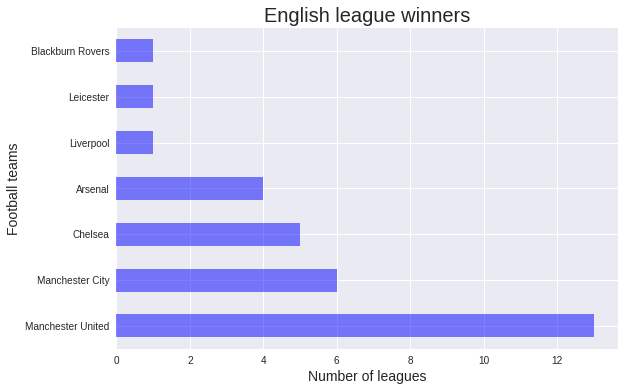

In [53]:
first_position = df_scores[df_scores['Rank'] == 1].Team_Name.value_counts()
p = first_position.plot(kind='barh', color='b', alpha=0.5)
plt.xlabel('Number of leagues', fontsize=14)
plt.ylabel('Football teams', fontsize=14)
plt.title('English league winners', fontsize=20)

Runner Up of EPL

# **English Premier League Runner-Up:**
We have prepared DF scores and then filtered out the rows in which rank = 2 and then we ran a value count on it. This allowed us to filter the dataset to show the runner-ups. We then created a chart that allowed us to view the data clearly to dissect the information. Manchester United has been the runner ups for 7 times showing that they are the most fierce competitors in the English Premier League. Arsenal came in second place as they have been runner-ups for 6 times. Liverpool came in third place as they have been runner-ups for 5 times. Manchester and Chelsea are tied for fourth place as they both have been runner-ups for 4 times. Newcastle comes in fifth place as they have been runner-ups for 2 times. Tottenham, Blackburn Rovers, and Aston Villa have been runner-ups for 1 time each thus they are all tied for sixth, seventh, and eighth place.  

Text(0.5, 1.0, 'English league winners')

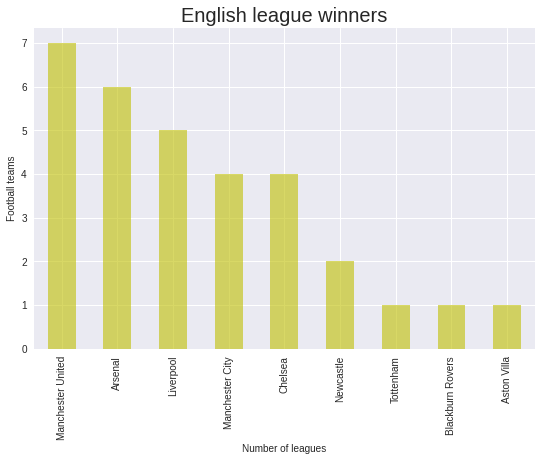

In [54]:
second_position = df_scores[df_scores['Rank'] == 2].Team_Name.value_counts()
p = second_position.plot(kind='bar', color='y', alpha=0.6)
plt.xlabel('Number of leagues', fontsize=10)
plt.ylabel('Football teams', fontsize=10)
plt.title('English league winners', fontsize=20)

In [55]:
League_dominate = pd.get_dummies(df_scores[df_scores['Rank'] == 1][['Team_Name', 'season']], columns=['Team_Name'], prefix='', prefix_sep='')
League_dominate.set_index('season', inplace=True)
League_dominate

,Arsenal,Blackburn Rovers,Chelsea,Leicester,Liverpool,Manchester City,Manchester United
season,,,,,,,
2022-23,1,0,0,0,0,0,0
2021-22,0,0,0,0,0,1,0
2020-21,0,0,0,0,0,1,0
2019-20,0,0,0,0,1,0,0
2018-19,0,0,0,0,0,1,0
2017-18,0,0,0,0,0,1,0
2016-17,0,0,1,0,0,0,0
2015-16,0,0,0,1,0,0,0
2014-15,0,0,1,0,0,0,0


**Check who is dominating the league in 2000's**


# **Who is Currently Dominating the League:**
We then proceeded to filter out our dataset to isolate the teams that have been dominating the league each season from 1992 to 2023. Even though the 2022-2023 season is ongoing, we felt that it was important to include it in our dataset because we can get a better understanding of each team’s current standings in the league as well as their past standings. From this filter, we learned that currently Arsenal is dominating the league during the 2022-2023 season. 

# **Who’s been dominating the league in the early 2000s:**
From our previous analysis we were able to get the exact number of games each team has won or been close to winning. From the chart we created, we were able to identify which team won each season. This chart is ranged from 2000 to 2009 and shows the peaks of each ranking team in the league. As we can see our analysis that Manchester United is consistently in the ranks is reflected in our chart. Additionally, we see that Chelsea has a huge peak in the 2004-2005 season which shows that they were the champion that season. 

Text(0, 0.5, 'Points')

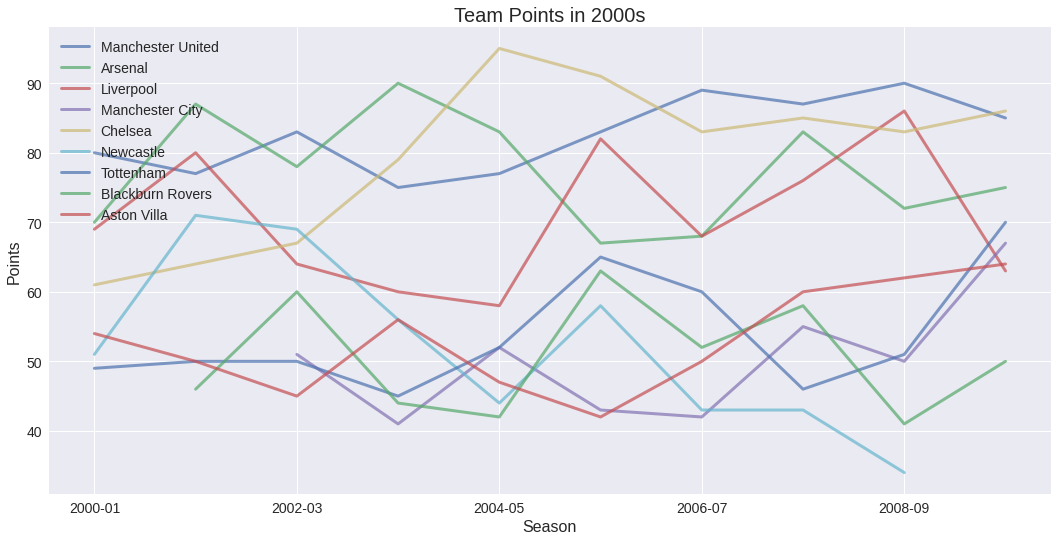

In [56]:
# data frame containing the goals for 
df_2000s = df_scores.pivot(index='season', columns='Team_Name', values='Points')

# select the data from season 2010
seasons = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Newcastle', 'Tottenham', 'Blackburn Rovers', 'Aston Villa']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Team Points in 2000s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)

Text(0, 0.5, 'Points')

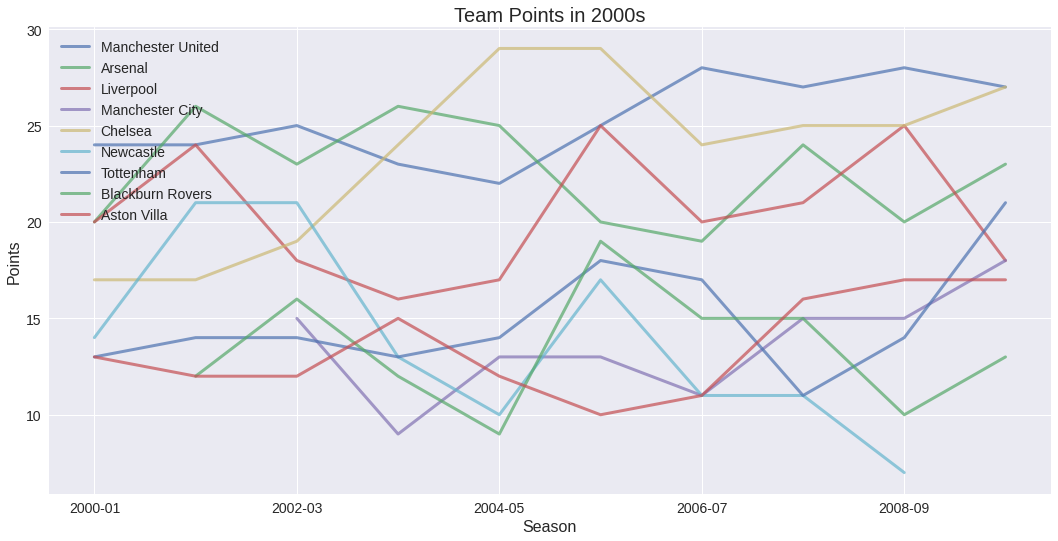

In [57]:
# data frame containing the goals for 
df_2000s = df_scores.pivot(index='season', columns='Team_Name', values='W')

# select the data from season 2010
seasons = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Newcastle', 'Tottenham', 'Blackburn Rovers', 'Aston Villa']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Team Points in 2000s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)


Text(0, 0.5, 'Points')

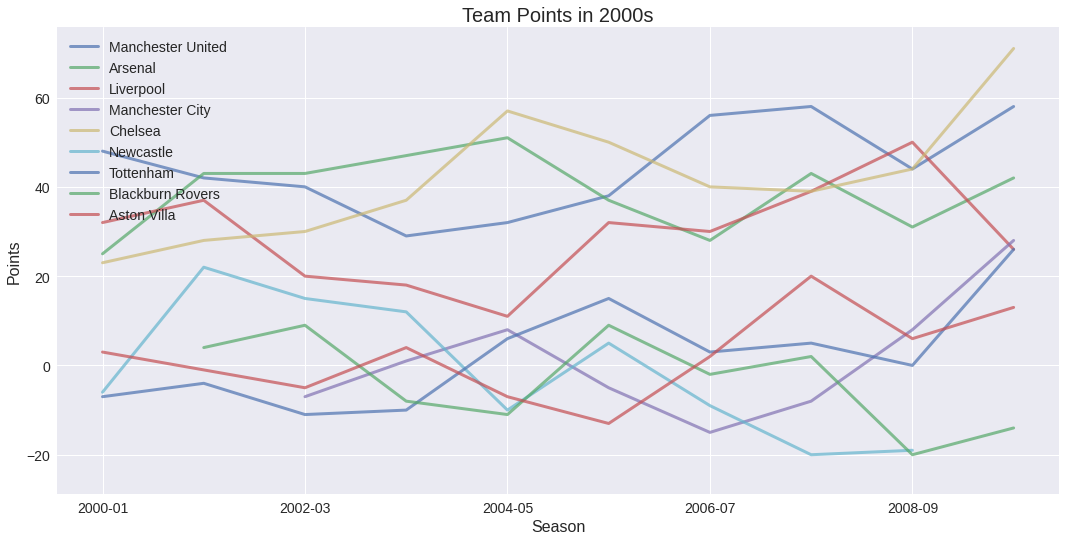

In [58]:
# data frame containing the goals for 
df_2000s = df_scores.pivot(index='season', columns='Team_Name', values='GD')

# select the data from season 2010
seasons = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Newcastle', 'Tottenham', 'Blackburn Rovers', 'Aston Villa']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Team Points in 2000s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)


Text(0, 0.5, 'Points')

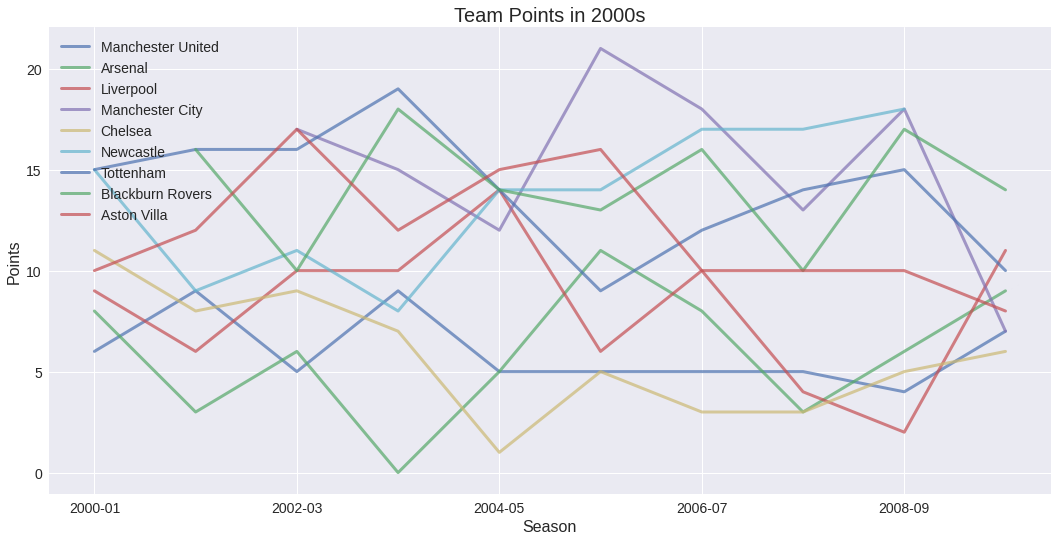

In [59]:
# data frame containing the goals for 
df_2000s = df_scores.pivot(index='season', columns='Team_Name', values='L')

# select the data from season 2010
seasons = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Newcastle', 'Tottenham', 'Blackburn Rovers', 'Aston Villa']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Team Points in 2000s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)


2010's

Text(0, 0.5, 'Points')

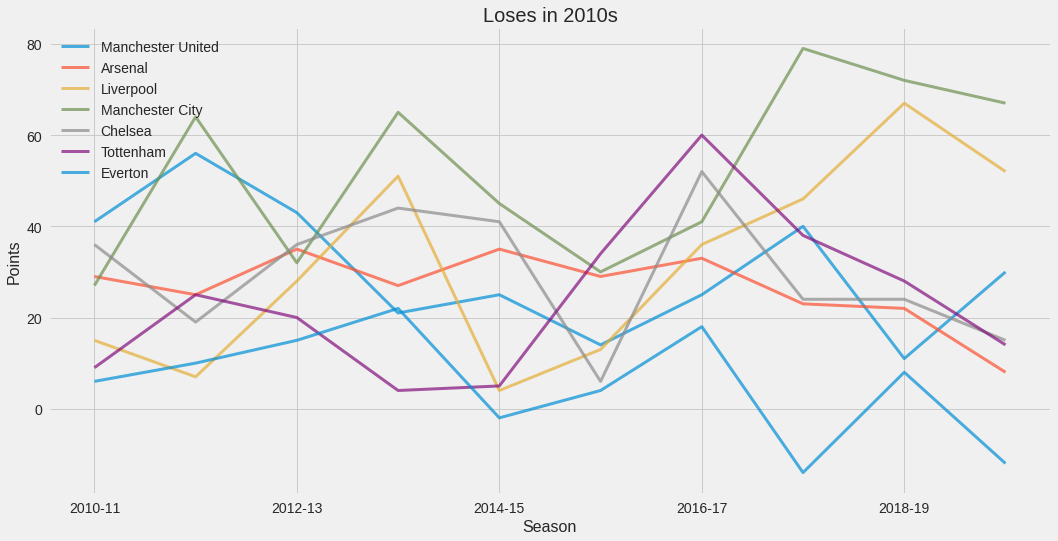

In [90]:
# data frame containing the goals for 
df_2010s = df_scores.pivot(index='season', columns='Team_Name', values='L')

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Tottenham', 'Everton']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Loses in 2010s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)

Text(0, 0.5, 'Points')

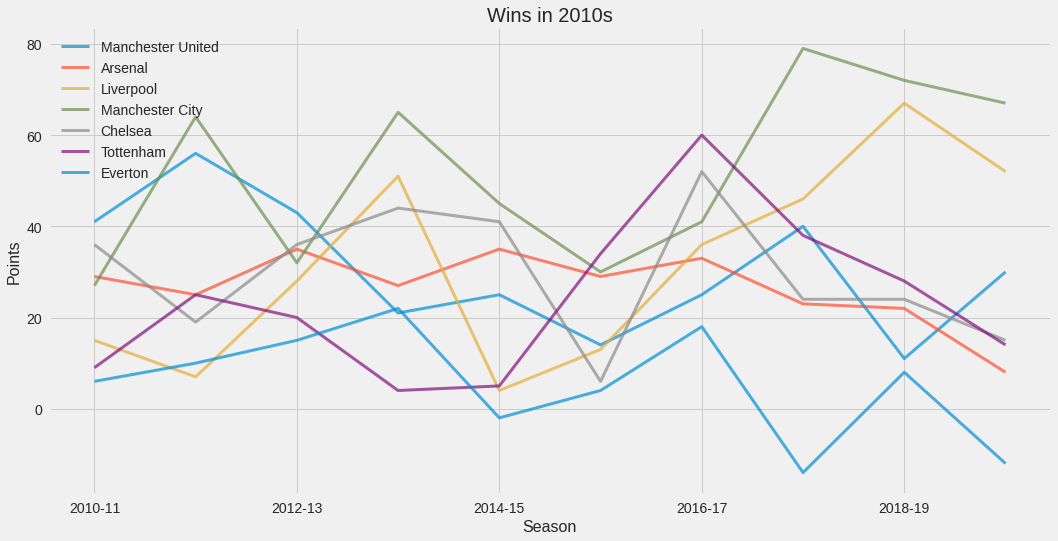

In [89]:
# data frame containing the goals for 
df_2010s = df_scores.pivot(index='season', columns='Team_Name', values='W')

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Tottenham', 'Everton']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Wins in 2010s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)

Text(0, 0.5, 'Points')

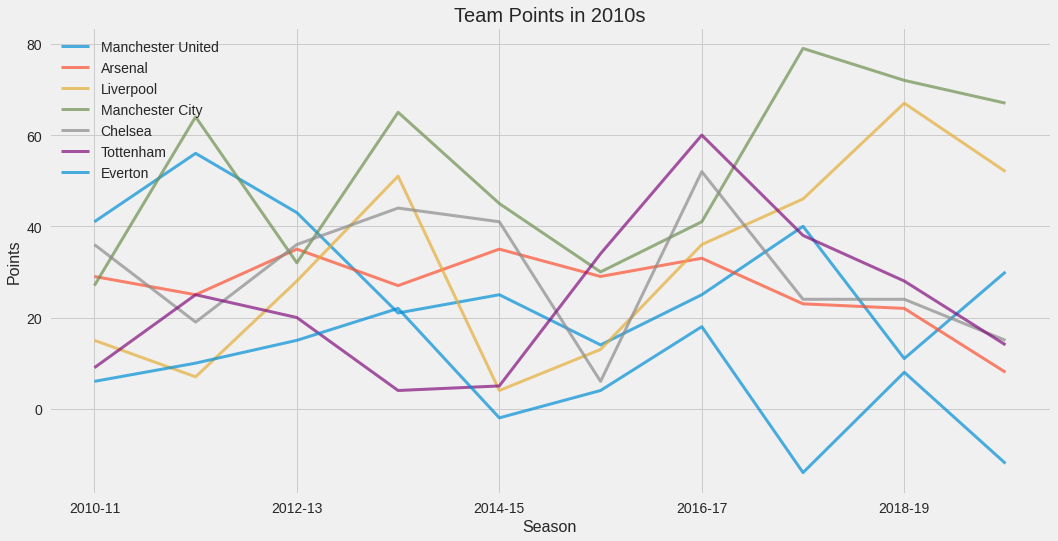

In [88]:
# data frame containing the goals for 
df_2010s = df_scores.pivot(index='season', columns='Team_Name', values='Points')

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Tottenham', 'Everton']

# plot the results using a line plot
df_2000s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Team Points in 2010s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)

Text(0, 0.5, 'Points')

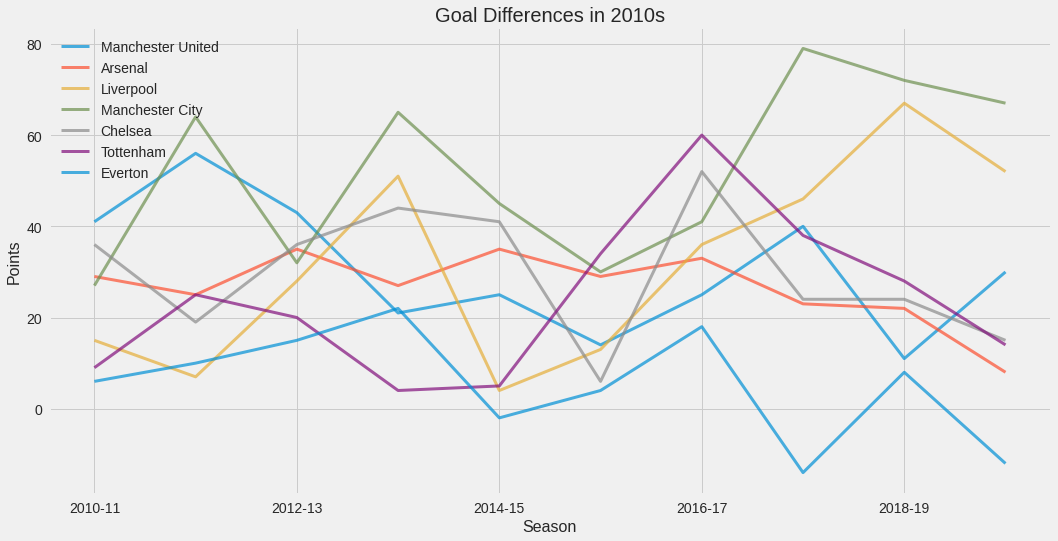

In [91]:
# data frame containing the goals for 
df_2010s = df_scores.pivot(index='season', columns='Team_Name', values='GD')

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Manchester United', 'Arsenal', 'Liverpool', 'Manchester City','Chelsea', 'Tottenham', 'Everton']

# plot the results using a line plot
df_2010s.loc[seasons, teams].plot(alpha=0.7, linewidth=3, figsize=(16,8))


# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')

# define the title and the labels
plt.title('Goal Differences in 2010s', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Points', fontsize=16)

**Total Number of Seasons in First Divisions**

# **Total Number of Seasons each team has been in the First Division:**
We created a bar graph and sorted the values using ascending order to show us clearly how long each team in the league has been in the first division. Liverpool and Manchester United are tied for first place for being in the First Division for the longest time. Arsenal comes in third and Chelsea comes in fourth place. 

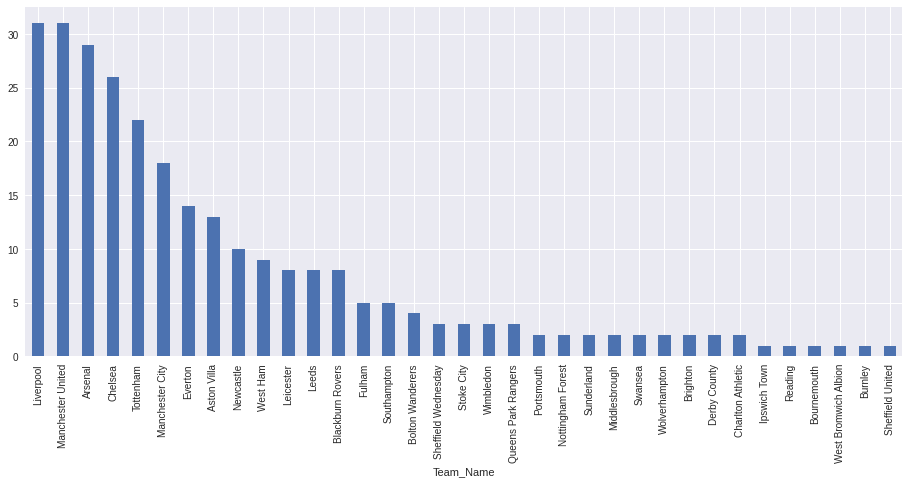

In [64]:
df_scores['fd'] = df_scores['Rank'].map(lambda x : 1 if (int(x)<10) else 0)
df_FDs = df_scores.groupby('Team_Name').sum('fd').fd.sort_values(ascending = False)[0:35]
df_FDs.plot(kind='bar', figsize=(14,6))

**Fairplay**

Red Card

# **The Number of Red Cards Per Season:**
We did a groupby() of the seasons and then counted the red cards that were given out each season. One peak that was very noticeable was that a season between Season 2002-2003 and Season 2007-2008 had the most number of red cards handed out. Additionally in the initial season from 1993-1994 seemed to have the least number of red cards handed out. 

Text(0, 0.5, 'Total number of red cards')

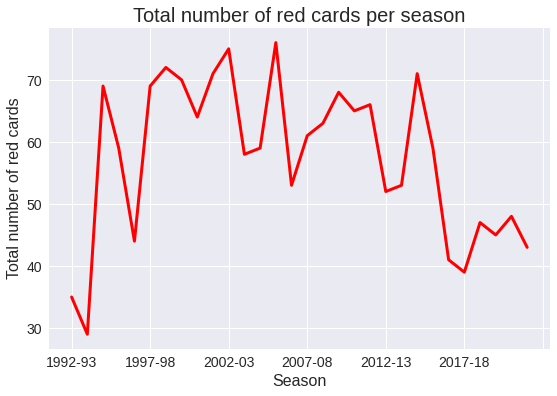

In [65]:
# number of red cards per season
red_cards = df_scores.groupby('season').sum().RD[:-1]

# plot the results using a line plot
red_cards.plot(linewidth=3, color='r')

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Total number of red cards per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total number of red cards', fontsize=16)

Yellow Card

# **The number of Yellow Cards Per Season:**
We did a groupby() of the season again but this time with YC instead of RD which helped us only isolate the number of yellow cards per season. Two peaks were noticeable in the season ranges of 1997-1998 to 2002-2002 and season ranges of 2012-2013 to 2017-2018 which seemed to have the highest number of yellow cards handed out. 

Text(0, 0.5, 'Total number of yellow cards')

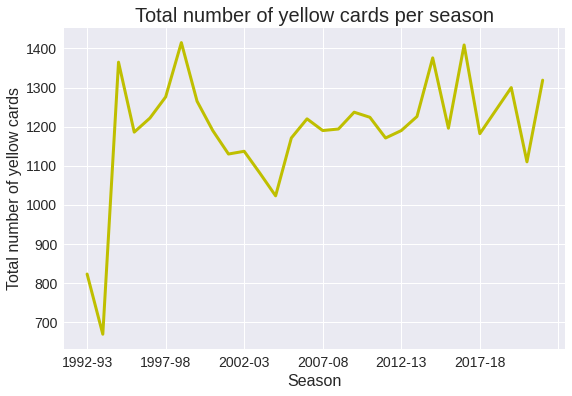

In [66]:
# number of yellow cards per season
yellow_cards = df_scores.groupby('season').sum().YC[:-1]

# plot the results using a line plot
yellow_cards.plot(linewidth=3, color='y')

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Total number of yellow cards per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total number of yellow cards', fontsize=16)

Average number of yellow cards by team from 2000 until 2020

# **The Average Number of Yellow Cards Per Team:**
We then calculated the average of yellow cards from 2000 until 2020 for each team and sorted them in ascending order so we could clearly assess the data. Coventry is in the lead for having the most number of yellow cards and Derby County is in second place. 


Text(0, 0.5, 'Average number of yellow cards')

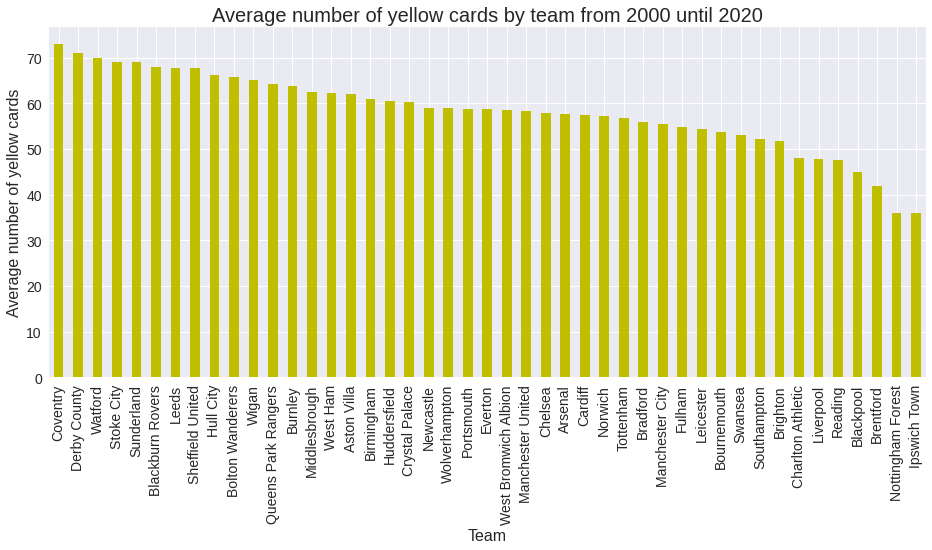

In [67]:
# average number of yellow cards by team from 2000 until 2020
yellow_from_1990 = df_scores[df_scores['season']>='2000-01'].groupby('Team_Name').mean().YC.sort_values(ascending=False)

# plot the results using a bar plot
yellow_from_1990.plot(kind='bar', color='y', figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Average number of yellow cards by team from 2000 until 2020', fontsize=20)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Average number of yellow cards', fontsize=16)

Average number of red cards by team from 2000 until 2020

# The average number of Red Cards per Team:
We calculated the average number of red cards per team from 2000 to 2020 for each team and sorted them in ascending order so we could clearly assess the data. Queens Park Rangers took first place for the average number of red cards. 

Text(0, 0.5, 'Average number of red cards')

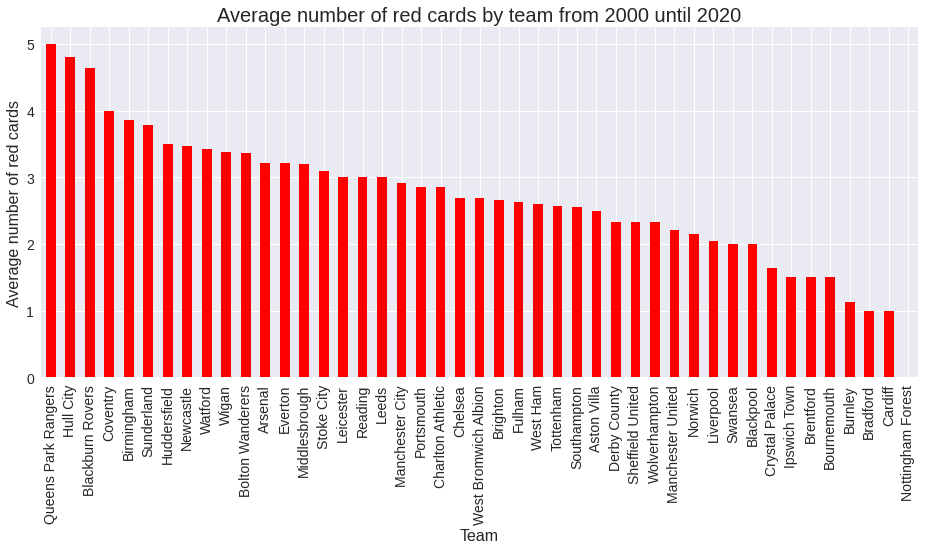

In [68]:
# average number of red cards by team from 2000 until 2020
red_from_1990 = df_scores[df_scores['season']>='2000-01'].groupby('Team_Name').mean().RD.sort_values(ascending=False)

# plot the results using a bar plot 
red_from_1990.plot(kind='bar', color='r', figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Average number of red cards by team from 2000 until 2020', fontsize=20)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Average number of red cards', fontsize=16)

Assigning fairplay violation points by 1 point for every yellow card and 2 for every red card

# **Fairplay:**
We create a chart to show the inverse of the maximum number of violations per team. We value red cards at 2 points and yellow cards at 1 point. We then subtracted the score by the total number of violations to calculate the Fairplay score. Nottingham Forest has the best Fairplay score with Blackpool coming in second. 

Text(0, 0.5, 'Fairplay Score')

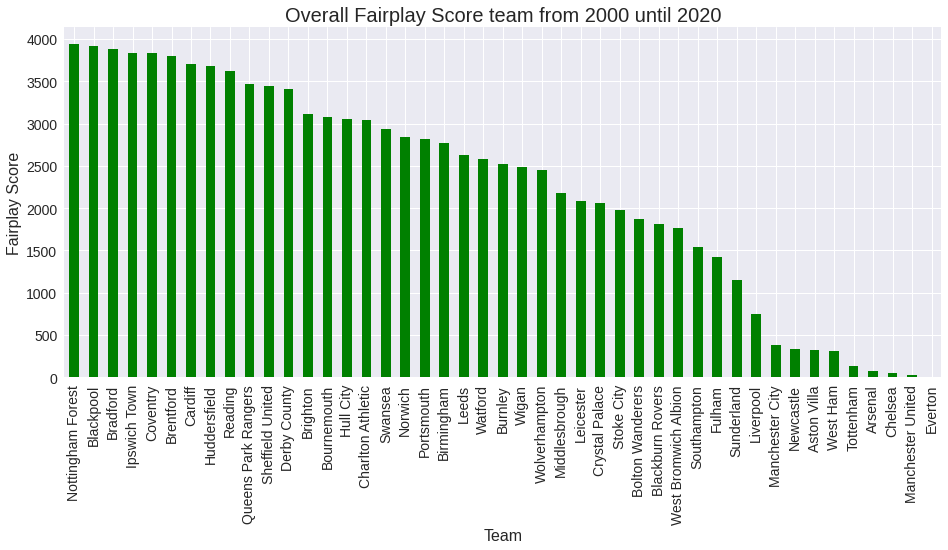

In [69]:
violations = (df_scores[df_scores['season']>='2000-01'].groupby('Team_Name').sum().YC) + 2*(df_scores[df_scores['season']>='2000-01'].groupby('Team_Name').sum().YC) 
max_violations = violations.max()
fairplay = violations.apply(lambda x : max_violations-x ).sort_values(ascending = False).rename("fairplay")

fairplay.plot(kind='bar', color='g', figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Overall Fairplay Score team from 2000 until 2020', fontsize=20)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Fairplay Score', fontsize=16)

**Regression**

Let's test the hypothesis that the number of times a league is in the first divison is linearly related to the team's average Goal difference and it's Fairplay. Let's first create a table for the teams' avg GD 

Text(0, 0.5, 'Average goal difference')

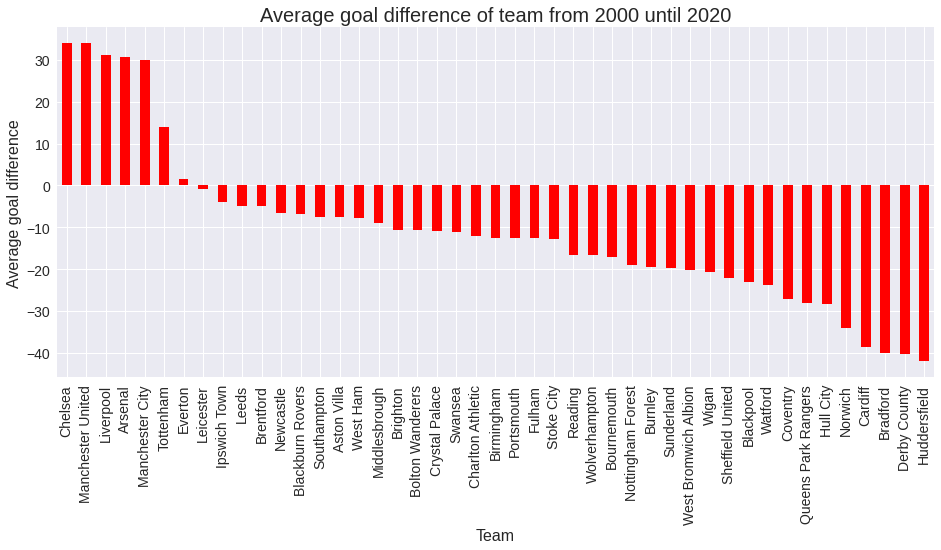

In [70]:
# average number of red cards by team from 2000 until 2020
df_gd = df_scores[df_scores['season']>='2000-01'].groupby('Team_Name').mean().GD.sort_values(ascending=False)

# plot the results using a bar plot 
df_gd.plot(kind='bar', color='r', figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Average goal difference of team from 2000 until 2020', fontsize=20)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Average goal difference', fontsize=16)

Now let us create a multiple linear regression with Number of times in the First division as the response variable and the the GD and Fairplay score as our explanatory variables

In [71]:
df=pd.concat([df_FDs,fairplay,df_gd],axis=1).dropna()
X = df[['fairplay', 'GD']]
y = df['fd']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 13.79758001313331
Coefficients: [-0.00185721  0.37764659]


The code above printed few important values from our model. Those values are the intercept and coefficients values of the models which can be put in mathematic equation as below:

>y = 13.79 - 0.0018 * (fairplay) + 0.377 *(goal_difference)

Let’s breakdown what each of those number means:

The intercept value is the estimated average value of our dependent variable when all of our independent variables values is 0. In our case this means that in the case that a team has a fairplay_score is 0 and their goal difference is 0 they will be in the first division about 13.8 times.

For the coefficients we have 2 values for the Fairplay and GD variables respectively. This value represents the relation of our independent variable to the dependent variable, where a change of exactly 1 at the independent variable will change the value of our dependent variable the same amount as the coefficient. This means that a 1 unit increase in the fairplay score will reduce the average number of times the team is in the first division by about 0.002 and 1 unit increase in the goal difference score will increase the average number of times the team is in the first division by about 0.38.


> Before going into the next step we will try to visualize our model into 3D graph with the code cell below. We will draw the linear model as a blue plane and we will plot our data point in the graph as grey dot.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


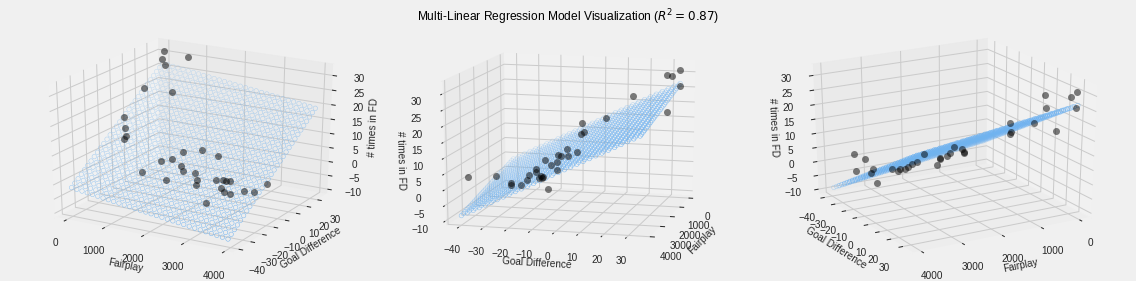

In [72]:
# Prepare data
X = df[['fairplay', 'GD']].values.reshape(-1,2)
Y = df['fd']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(df['fairplay'].min(), df['fairplay'].max(), 30)  # range of fairplay score values
yy_pred = np.linspace(df['GD'].min(), df['GD'].max(), 30)  # range of Goal Difference values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Fairplay', fontsize=10)
    ax.set_ylabel('Goal Difference', fontsize=10)
    ax.set_zlabel('# times in FD', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=12, color='k')

fig.tight_layout()


> After building the model it is important for us to validate it’s performance. We can evaluate a model by looking at it’s coefficient of determination (R²), F-test, t-test, and also residuals. Before we continue we will rebuild our model using the statsmodel library with the OLS() function. Then we will print the model summary using the summary() function on the model. The model summary contains lots of important value we can use to evaluate our model.

In [73]:
import statsmodels.api as sm

X = df[['fairplay', 'GD']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df['fd'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.59e-14
Time:                        02:59:17   Log-Likelihood:                -86.812
No. Observations:                  33   AIC:                             179.6
Df Residuals:                      30   BIC:                             184.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7976      1.264     10.913      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


> In statsmodel we can obtain the R² value of our model by accesing the .rsquared attribute of the our model.

In [74]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.8709385047958562


> R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship. In our case, we got R² score about 0.5214 which means 87.09% of our dependent variable can be explained using our independent variables.

In [75]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 101.22366513167738
Probability of observing value at least as high as F-statistic: 4.591455535398801e-14


> Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [76]:
print(olsmod.pvalues)

const       5.755484e-12
fairplay    9.642752e-03
GD          6.661796e-09
dtype: float64


> Both of our independent variables, Fairplay Score and Goal Difference, have p-value less than 0.05 which shows that there is sufficient evidence that Fairplay Score and Goal Difference affects the number of times the team is in the first division.






**MANCHESTER UNITED VS MANCHESTER CITY **

Manchester United and Manchester City have an ongoing rivalry since many years.
United has dominated the 2000's but 2010's have been dominated by Manchester City. The 2 arch rivals have been compared on basis of several different aspects like Points ,Goals,GD per season
In order to do the comparison we have choosen points and wins.
For the coding point we have cleaned the data for the comparison. We have copied the data from df_scores for both the teams.We had to remove the 1990's as city had faced many relegation in that phase and the data for those years was not available ton perform the analysis.We have picked the data from 2003 to latest season. In order to draw plots using seaborn I have merged the data horizontally on Year_d and further plotted data on graphs. 

In [77]:
import warnings
from pandas.core.common import SettingWithCopyWarning

In [78]:
df_manc=df_scores.loc[df_scores['Team_Name']=="Manchester City"]
df_manu=df_scores.loc[df_scores['Team_Name']=="Manchester United"]
df_test_manc=pd.DataFrame()
df_test_manu=pd.DataFrame()
df_manu['Year_d'] = df_manu['Year_d'].apply(pd.to_numeric)
df_manc['Year_d'] = df_manc['Year_d'].apply(pd.to_numeric)
df_manu = df_manu[(df_manu['Year_d'] >=3) & (df_manu['Year_d'] <= 23)]
df_manc = df_manc[(df_manc['Year_d'] >=3) & (df_manc['Year_d'] <= 23)]
df_manu.reset_index(inplace=True)
df_manc.reset_index(inplace=True)
df_cw=pd.DataFrame()
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
df_cw['manc_w'] = df_manc['W']
df_cw['manu_w'] = df_manu['W']
df_cw['Year_d']=df_manc['Year_d']
list1=list(df_manc['Year_d'])
# plt.plot(list1, df_manc['W'], label = "Man_C")
# plt.plot(list1, df_manu['W'], label = "Man_Utd")
# plt.xticks(list1,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])





In [79]:
df_cw = df_cw.sort_values('Year_d').reset_index()

In [80]:
import seaborn as sns

In [82]:
temp=df_manc.merge(df_manu,on="Year_d")
temp.head()

,index_x,Rank_x,Team_Name_x,Points_x,P_x,W_x,D_x,L_x,F_x,A_x,...,W_y,D_y,L_y,F_y,A_y,YC_y,RD_y,season_y,GD_y,fd_y
0,1,2,Manchester City,32,14,10,2,2,40,14,...,8,2,4,20,20,37,0,2022-23,0,1
1,0,1,Manchester City,93,38,29,6,3,99,26,...,16,10,12,57,57,76,2,2021-22,0,1
2,0,1,Manchester City,86,38,27,5,6,83,32,...,21,11,6,73,44,64,1,2020-21,29,1
3,1,2,Manchester City,81,38,26,3,9,102,35,...,18,12,8,66,36,73,0,2019-20,30,1
4,0,1,Manchester City,98,38,32,2,4,95,23,...,19,9,10,65,54,75,4,2018-19,11,1


[Text(0, 0.5, 'Wins'), Text(0.5, 0, 'year'), Text(0.5, 1.0, 'Wins')]

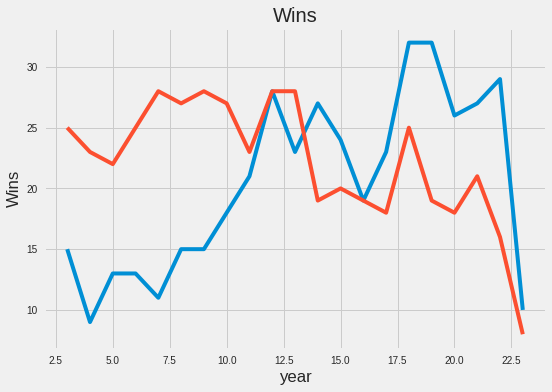

In [86]:
#WIN COMPARISON
fig, ax = plt.subplots()
ax = sns.lineplot(data=temp, x = "Year_d", y = "W_x")
ax1 = sns.lineplot(data=temp, x = "Year_d", y = "W_y")
ax.set(xlabel ="year", ylabel = "Wins", title ='Wins')

[Text(0, 0.5, 'Goals Difference'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Goal Difference')]

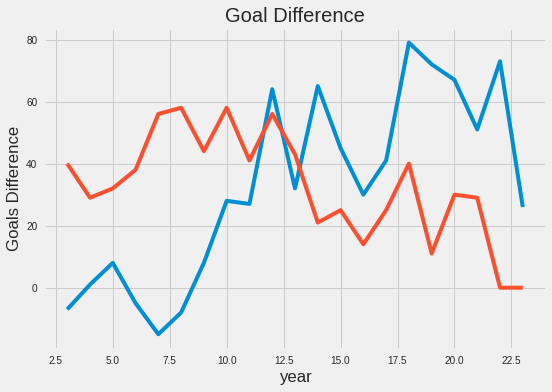

In [85]:
#GD_COMPARISON
fig, ax = plt.subplots()
ax = sns.lineplot(data=temp, x = "Year_d", y = "GD_x")
ax1 = sns.lineplot(data=temp, x = "Year_d", y = "GD_y")
ax.set(xlabel ="year", ylabel = "Goals Difference", title ='Goal Difference')